## QuTiP Demo

In [2]:
## import necessary packages
import sys
import numpy as np
import matplotlib as mpl
import math
from cmath import cos, sin, exp, pi
# import cmath

# mpl.rcParams['figure.dpi'] = 400
# mpl.rcParams["figure.figsize"] = [10, 6]
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 400
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# print(sys.version)
# print(sys.executable)
# print(np.__version__)
# print(mpl.__version__)

from qutip import *


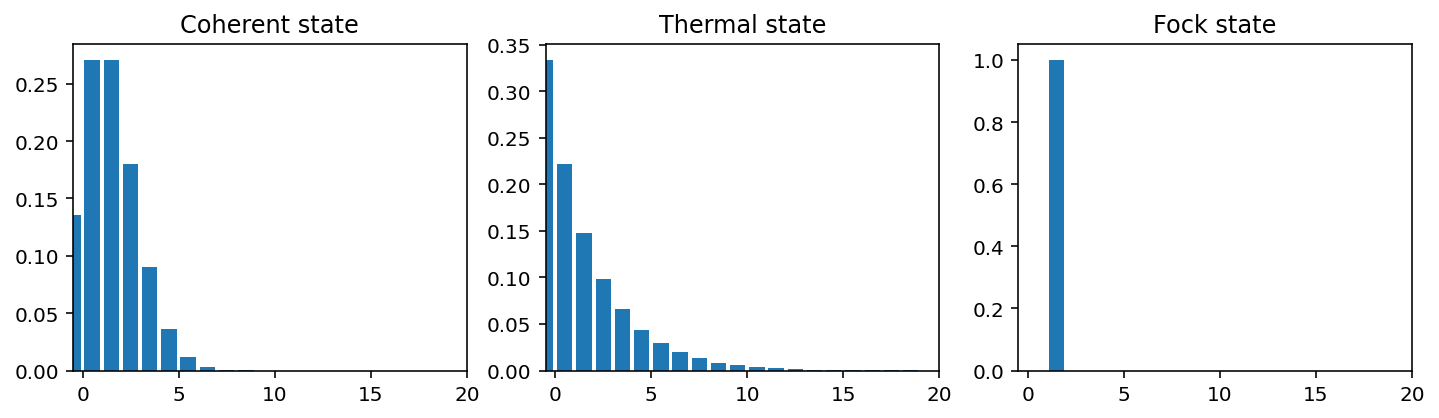

In [6]:
N = 20

rho_coherent = coherent_dm(N, np.sqrt(2))

rho_thermal = thermal_dm(N, 2)

rho_fock = fock_dm(N, 2)

fig, axes = plt.subplots(1, 3, figsize=(12,3))

bar0 = axes[0].bar(np.arange(0, N)-.5, rho_coherent.diag())

lbl0 = axes[0].set_title("Coherent state")

lim0 = axes[0].set_xlim([-.5, N])

bar1 = axes[1].bar(np.arange(0, N)-.5, rho_thermal.diag())

lbl1 = axes[1].set_title("Thermal state")

lim1 = axes[1].set_xlim([-.5, N])

bar2 = axes[2].bar(np.arange(0, N)-.5, rho_fock.diag())

lbl2 = axes[2].set_title("Fock state")

lim2 = axes[2].set_xlim([-.5, N])

plt.show()

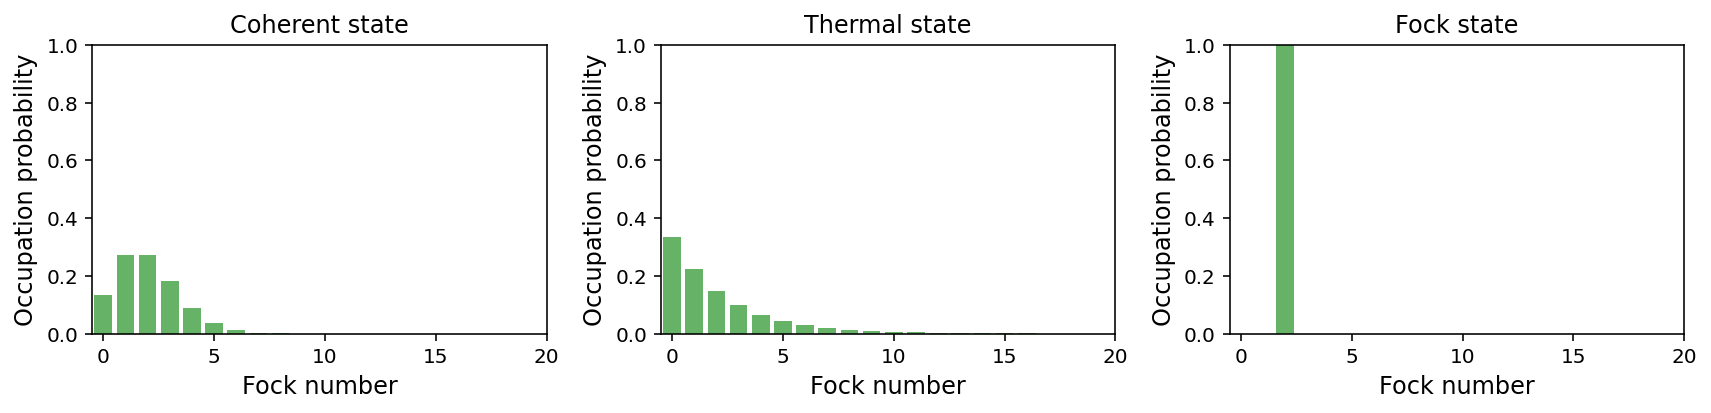

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

plot_fock_distribution(rho_coherent,
                       fig=fig,
                       ax=axes[0],
                       title="Coherent state")

plot_fock_distribution(rho_thermal, fig=fig, ax=axes[1], title="Thermal state")

plot_fock_distribution(rho_fock, fig=fig, ax=axes[2], title="Fock state")

fig.tight_layout()

plt.show()

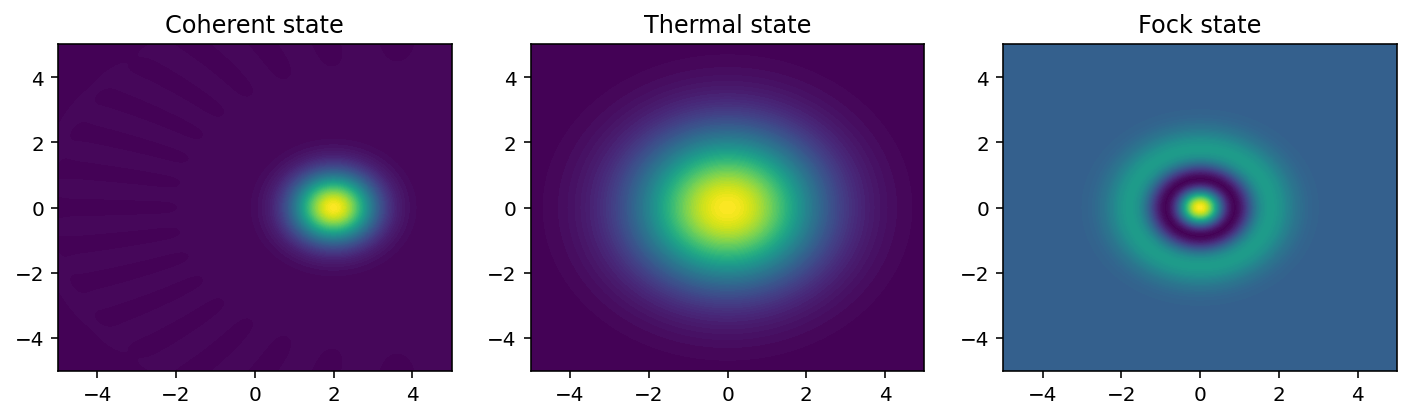

In [11]:
xvec = np.linspace(-5, 5, 200)

W_coherent = wigner(rho_coherent, xvec, xvec)

W_thermal = wigner(rho_thermal, xvec, xvec)

W_fock = wigner(rho_fock, xvec, xvec)

# plot the results

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

cont0 = axes[0].contourf(xvec, xvec, W_coherent, 100)

lbl0 = axes[0].set_title("Coherent state")

cont1 = axes[1].contourf(xvec, xvec, W_thermal, 100)

lbl1 = axes[1].set_title("Thermal state")

cont0 = axes[2].contourf(xvec, xvec, W_fock, 100)

lbl2 = axes[2].set_title("Fock state")

plt.show()

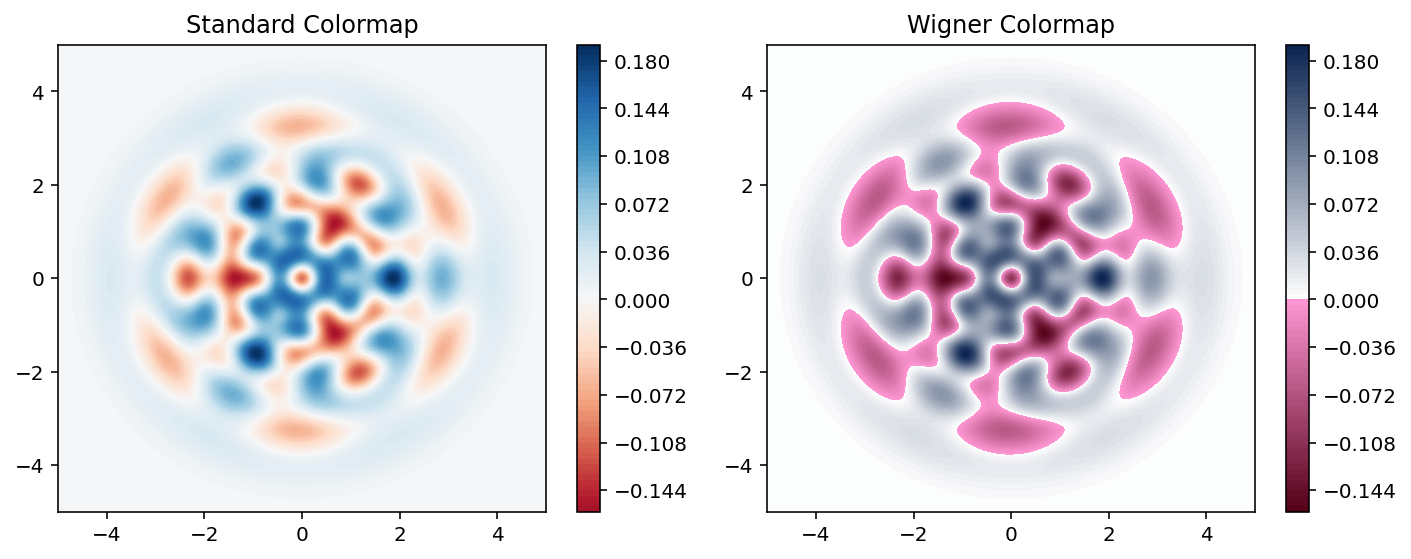

In [12]:
import matplotlib as mpl

from matplotlib import cm

psi = (basis(10, 0) + basis(10, 3) + basis(10, 9)).unit()

xvec = np.linspace(-5, 5, 500)

W = wigner(psi, xvec, xvec)

wmap = wigner_cmap(W)  # Generate Wigner colormap

nrm = mpl.colors.Normalize(-W.max(), W.max())

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

plt1 = axes[0].contourf(xvec, xvec, W, 100, cmap=cm.RdBu, norm=nrm)

axes[0].set_title("Standard Colormap")

cb1 = fig.colorbar(plt1, ax=axes[0])

plt2 = axes[1].contourf(xvec, xvec, W, 100, cmap=wmap)  # Apply Wigner colormap

axes[1].set_title("Wigner Colormap")

cb2 = fig.colorbar(plt2, ax=axes[1])

fig.tight_layout()

plt.show()

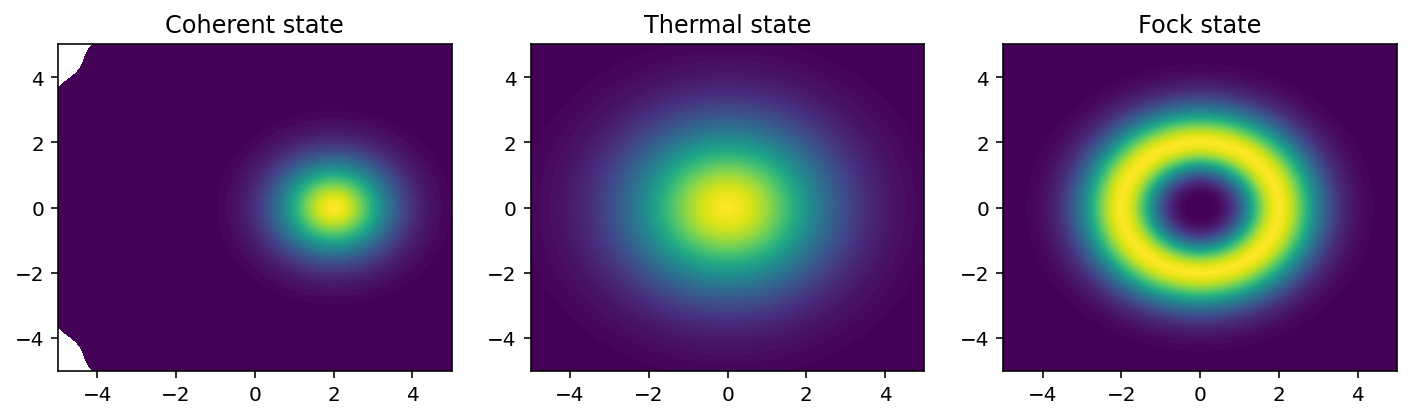

In [13]:
Q_coherent = qfunc(rho_coherent, xvec, xvec)
Q_thermal = qfunc(rho_thermal, xvec, xvec)
Q_fock = qfunc(rho_fock, xvec, xvec)
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
cont0 = axes[0].contourf(xvec, xvec, Q_coherent, 100)
lbl0 = axes[0].set_title("Coherent state")
cont1 = axes[1].contourf(xvec, xvec, Q_thermal, 100)
lbl1 = axes[1].set_title("Thermal state")
cont0 = axes[2].contourf(xvec, xvec, Q_fock, 100)
lbl2 = axes[2].set_title("Fock state")
plt.show()

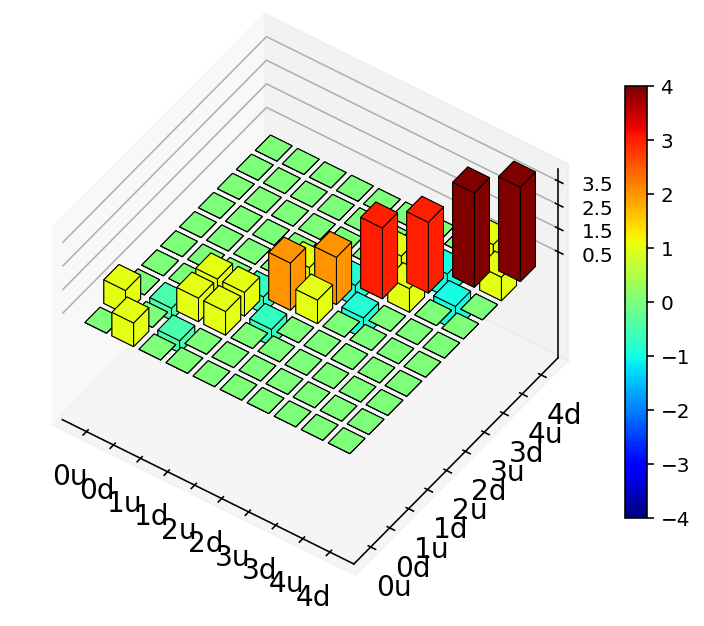

In [16]:
N = 5

a = tensor(destroy(N), qeye(2))

b = tensor(qeye(N), destroy(2))

sx = tensor(qeye(N), sigmax())

H = a.dag() * a + sx - 0.5 * (a * b.dag() + a.dag() * b)

# visualize H

lbls_list = [[str(d) for d in range(N)], ["u", "d"]]

xlabels = []

for inds in tomography._index_permutations([len(lbls) for lbls in lbls_list]):
    xlabels.append("".join(
        [lbls_list[k][inds[k]] for k in range(len(lbls_list))]))

fig, ax = matrix_histogram(H, xlabels, xlabels, limits=[-4, 4])

ax.view_init(azim=-55, elev=45)

plt.show()

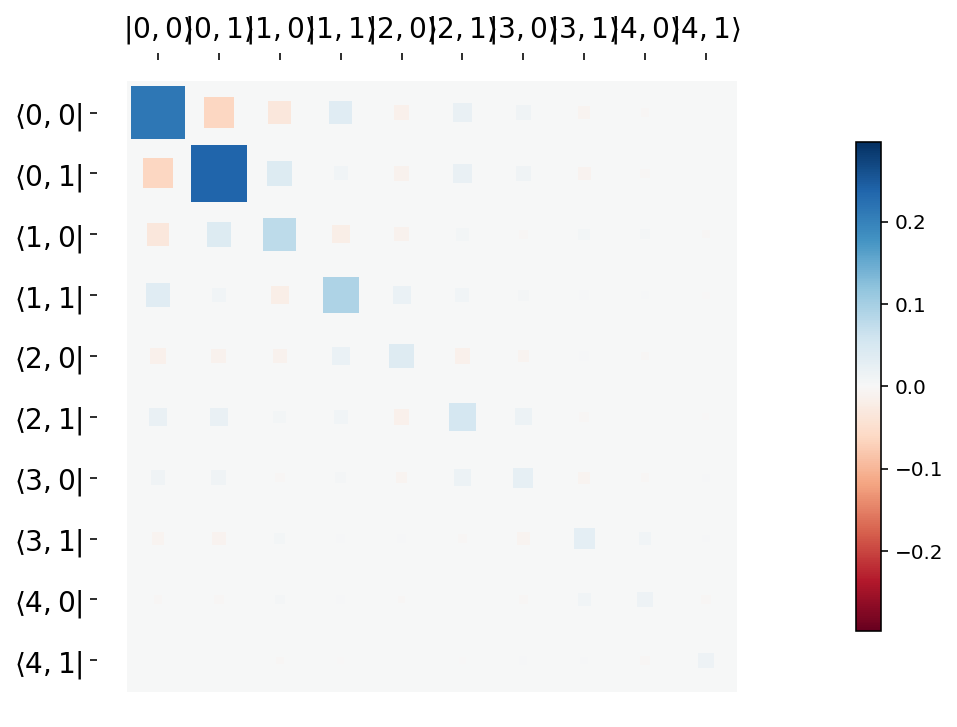

In [15]:
rho_ss = steadystate(H, [np.sqrt(0.1) * a, np.sqrt(0.4) * b.dag()])

hinton(rho_ss)

plt.show()

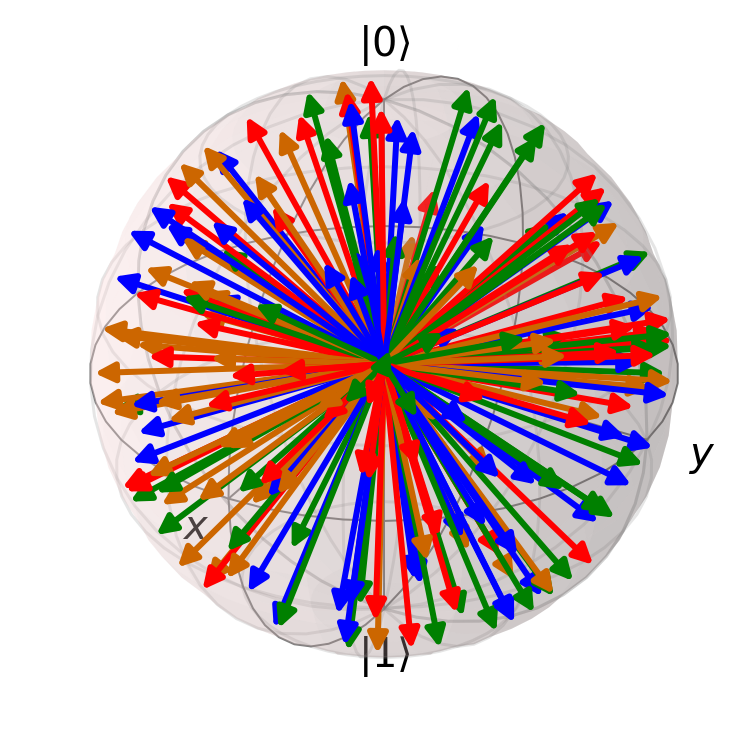

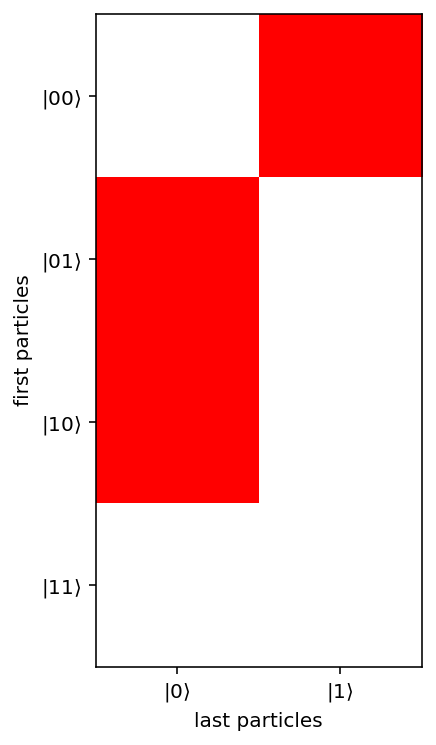

In [3]:
# some visualization

# Schmidt decomposition
plot_schmidt(w_state(3),
             splitting=2,
             labels_iteration=(3, 2),
             theme='light',
             fig=None,
             ax=None,
             figsize=(6, 6))

b = Bloch()
# pnt = [1/np.sqrt(3), 1/np.sqrt(3), 1/np.sqrt(3)]
# b.add_points(pnt)
b.add_states([rand_ket(2) for i in range(200)])
b.render()
b.show()

In [ ]:
# plot_expectation_values(results, ylabels=[], title=None, show_legend=False, fig=None, axes=None, figsize=(8, 4))

# plot_wigner_sphere(fig, ax, wigner, reflections)